In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pandas as pd
import os

In [2]:
os.chdir(r'../..') #change to project root dir

In [3]:
!python src/sood/algorithms/ce_vae.py \
    --run="predict" \
    --data-dir="./data/aia_171_2017_full_disk_256" \
    --test-dir="./data/aia_171_2017_full_disk_256" \
    -o "./output/aia_171_2017_256_cevae_quiet_pred" \
    --load-path="/Users/mariusgiger/Downloads/20210525-070039_cevae_128_quiet/checkpoint" \
    --ce-factor 0 \
    --logger="file" \
    --z-dim 128 \
    --target-size 256 \
    --score-mode grad \
    --mode="sample"

VAE(
  (enc): BasicEncoder(
    (start): ConvModule(
      (conv): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (activation): LeakyReLU(negative_slope=0.01)
    )
    (middle_blocks): ModuleList(
      (0): NoOp()
      (1): ConvModule(
        (conv): Conv2d(16, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (activation): LeakyReLU(negative_slope=0.01)
      )
      (2): NoOp()
      (3): ConvModule(
        (conv): Conv2d(64, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (activation): LeakyReLU(negative_slope=0.01)
      )
      (4): NoOp()
      (5): ConvModule(
        (conv): Conv2d(256, 1024, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (activation): LeakyReLU(negative_slope=0.01)
      )
    )
    (end): ConvModule(
      (conv): Conv2d(1024, 256, kernel_size=[16, 16], stride=(1, 1), bias=False)
    )
  )
  (dec): BasicGenerator(
    (start): ConvModule(
    

In [4]:
!python src/sood/algorithms/ce_vae.py \
    --run="predict" \
    --data-dir="./data/aia_171_2017_full_disk_256" \
    --test-dir="./data/aia_171_2017_full_disk_256" \
    -o "./output/aia_171_2017_256_cevae_quiet_pred" \
    --load-path="/Users/mariusgiger/Downloads/20210525-070039_cevae_128_quiet/checkpoint" \
    --ce-factor 0 \
    --logger="file" \
    --z-dim 128 \
    --target-size 256 \
    --score-mode grad \
    --mode="pixel"

VAE(
  (enc): BasicEncoder(
    (start): ConvModule(
      (conv): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (activation): LeakyReLU(negative_slope=0.01)
    )
    (middle_blocks): ModuleList(
      (0): NoOp()
      (1): ConvModule(
        (conv): Conv2d(16, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (activation): LeakyReLU(negative_slope=0.01)
      )
      (2): NoOp()
      (3): ConvModule(
        (conv): Conv2d(64, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (activation): LeakyReLU(negative_slope=0.01)
      )
      (4): NoOp()
      (5): ConvModule(
        (conv): Conv2d(256, 1024, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (activation): LeakyReLU(negative_slope=0.01)
      )
    )
    (end): ConvModule(
      (conv): Conv2d(1024, 256, kernel_size=[16, 16], stride=(1, 1), bias=False)
    )
  )
  (dec): BasicGenerator(
    (start): ConvModule(
    

In [5]:
pred_path = "./output/aia_171_2017_256_cevae_quiet_pred/20210601-103851_cevae/predictions/predictions.txt"
pixel_pred_path = "./output/aia_171_2017_256_cevae_quiet_pred/20210601-104124_cevae/predictions"
data_path = "./data/aia_171_2017_full_disk_256/test"

In [6]:
df = pd.read_csv(pred_path, header=None, names = ["img", "score"])
df.head()

,img,score
0,2017-01-01T000000__171.jpeg,0.033998
1,2017-01-01T120000__171.jpeg,0.033297
2,2017-01-02T000000__171.jpeg,0.032519
3,2017-01-02T120000__171.jpeg,0.033220
4,2017-01-03T000000__171.jpeg,0.033103


In [7]:
df = df.sort_values(by=['score'], ascending=False)
df.head(10)

,img,score
222,2017-04-22T120000__171.jpeg,0.042115
221,2017-04-22T000000__171.jpeg,0.041754
217,2017-04-20T000000__171.jpeg,0.041158
220,2017-04-21T120000__171.jpeg,0.041146
223,2017-04-23T000000__171.jpeg,0.040672
219,2017-04-21T000000__171.jpeg,0.040640
218,2017-04-20T120000__171.jpeg,0.040415
225,2017-04-24T000000__171.jpeg,0.040398
103,2017-02-21T120000__171.jpeg,0.040087
216,2017-04-19T120000__171.jpeg,0.039890


array([[<AxesSubplot:title={'center':'score'}>]], dtype=object)

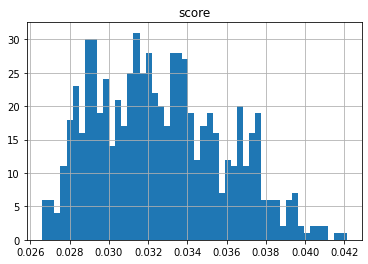

In [8]:
hist = df.hist(bins=50)
hist

In [9]:
df.describe()

,score
count,713.000000
mean,0.032637
std,0.003253
min,0.026603
25%,0.029898
50%,0.032299
75%,0.034941
max,0.042115


In [10]:
df.head(10)

,img,score
222,2017-04-22T120000__171.jpeg,0.042115
221,2017-04-22T000000__171.jpeg,0.041754
217,2017-04-20T000000__171.jpeg,0.041158
220,2017-04-21T120000__171.jpeg,0.041146
223,2017-04-23T000000__171.jpeg,0.040672
219,2017-04-21T000000__171.jpeg,0.040640
218,2017-04-20T120000__171.jpeg,0.040415
225,2017-04-24T000000__171.jpeg,0.040398
103,2017-02-21T120000__171.jpeg,0.040087
216,2017-04-19T120000__171.jpeg,0.039890


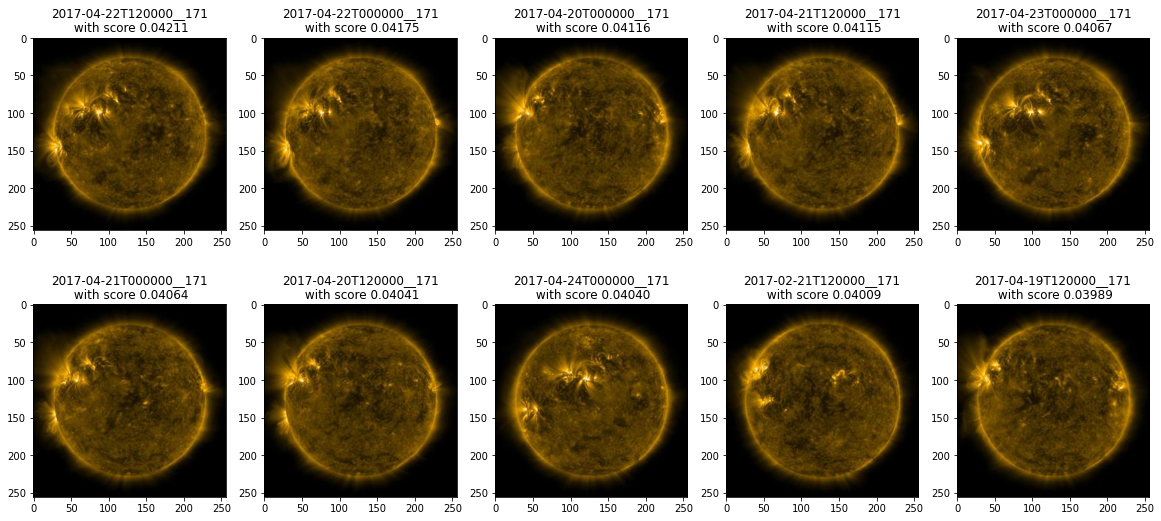

In [11]:
f, axarr = plt.subplots(2,5, figsize=(20, 9))

row_index = 0
column_index = 0

for index, row in df.head(10).iterrows():
    img_path = Path(data_path) / row["img"]
    img = Image.open(img_path)
    img_arr = np.asarray(img)
    axarr[row_index, column_index].set_title(row["img"].replace(".jpeg", "") + "\n with score " + "%.5f" % row["score"])
    axarr[row_index, column_index].imshow(img_arr, cmap='gray', vmin=0, vmax=255)
   
    if(column_index == 4):
        row_index = (row_index + 1)
        
    column_index = (column_index + 1) % 5 
        

In [12]:
df_asc = df.sort_values(by=['score'], ascending=True)
df_asc.head(10)

,img,score
623,2017-11-10T120000__171.jpeg,0.026603
572,2017-10-15T120000__171.jpeg,0.026746
571,2017-10-15T000000__171.jpeg,0.026822
624,2017-11-11T000000__171.jpeg,0.026833
667,2017-12-07T120000__171.jpeg,0.026876
573,2017-10-16T000000__171.jpeg,0.026909
668,2017-12-08T000000__171.jpeg,0.027077
666,2017-12-07T000000__171.jpeg,0.027078
570,2017-10-14T120000__171.jpeg,0.027096
625,2017-11-11T120000__171.jpeg,0.027126


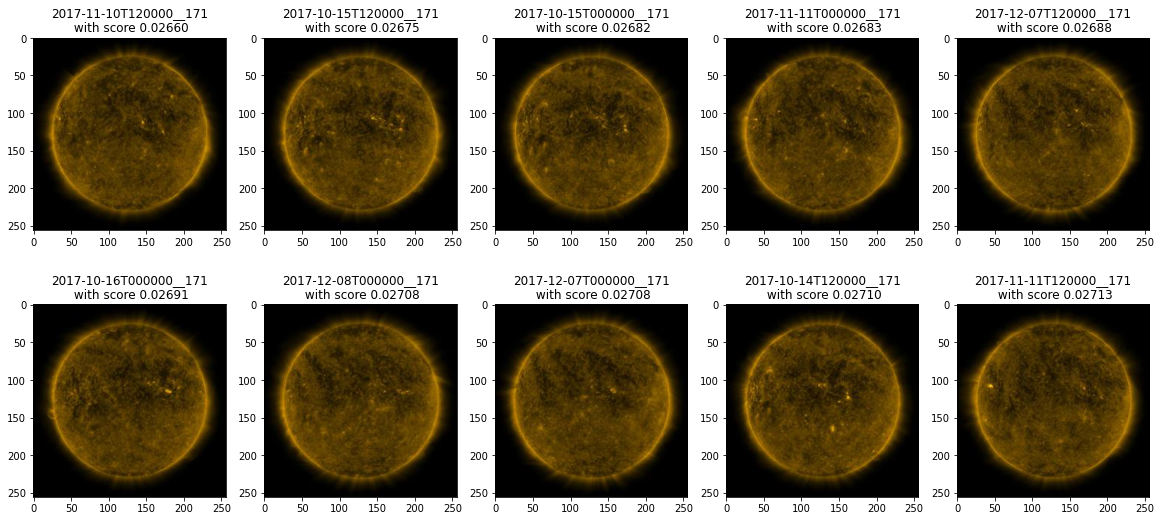

In [13]:
f, axarr = plt.subplots(2,5, figsize=(20, 9))

row_index = 0
column_index = 0

for index, row in df_asc.head(10).iterrows():
    img_path = Path(data_path) / row["img"]
    img = Image.open(img_path)
    img_arr = np.asarray(img)
    axarr[row_index, column_index].set_title(row["img"].replace(".jpeg", "") + "\n with score " + "%.5f" % row["score"])
    axarr[row_index, column_index].imshow(img_arr, cmap='gray', vmin=0, vmax=255)
   
    if(column_index == 4):
        row_index = (row_index + 1)
        
    column_index = (column_index + 1) % 5 
        

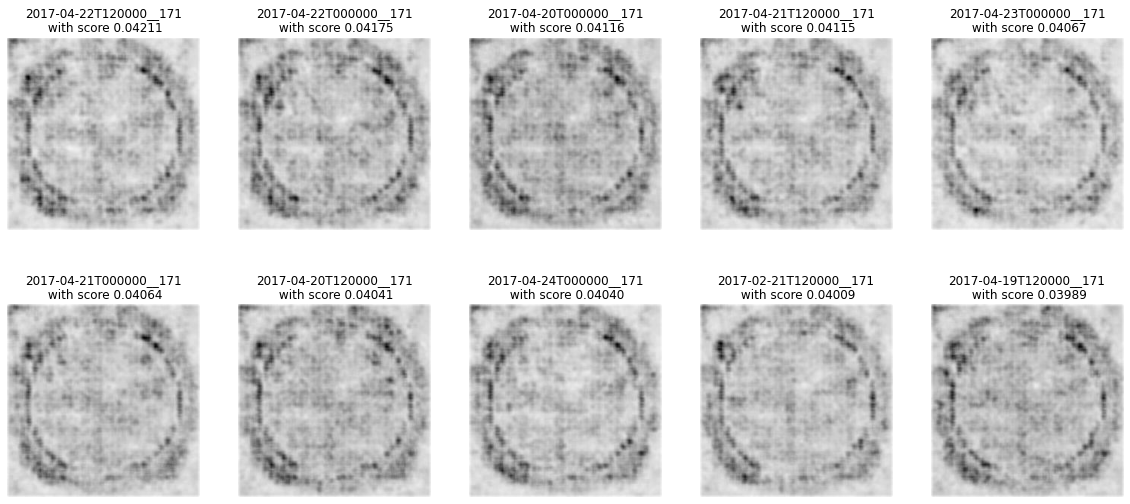

In [14]:
f, axarr = plt.subplots(2,5, figsize=(20, 9))

row_index = 0
column_index = 0

for index, row in df.head(10).iterrows():
    img_path = Path(pixel_pred_path) / row["img"]
    img = Image.open(img_path)
    img_arr = np.invert(np.asarray(img))
    axarr[row_index, column_index].set_title(row["img"].replace(".jpeg", "") + "\n with score " + "%.5f" % row["score"])
    axarr[row_index, column_index].imshow(img_arr, cmap='gray', vmin=0, vmax=255)
    axarr[row_index, column_index].spines['top'].set_visible(False)
    axarr[row_index, column_index].spines['right'].set_visible(False)
    axarr[row_index, column_index].spines['bottom'].set_visible(False)
    axarr[row_index, column_index].spines['left'].set_visible(False)
    axarr[row_index, column_index].xaxis.set_ticks([])
    axarr[row_index, column_index].yaxis.set_ticks([])

    if(column_index == 4):
        row_index = (row_index + 1)
        
    column_index = (column_index + 1) % 5 

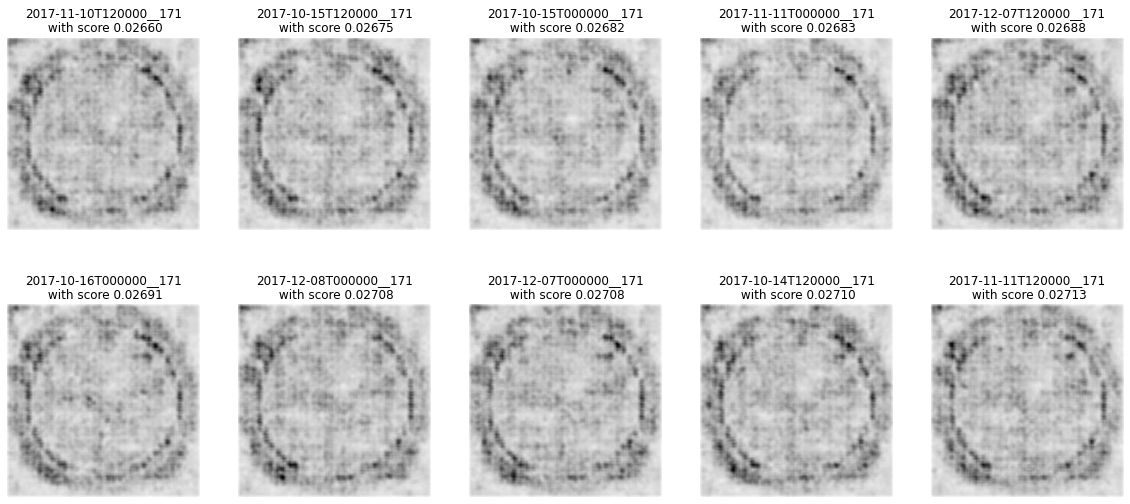

In [15]:
f, axarr = plt.subplots(2,5, figsize=(20, 9))

row_index = 0
column_index = 0

for index, row in df.sort_values(by=['score'], ascending=True).head(10).iterrows():
    img_path = Path(pixel_pred_path) / row["img"]
    img = Image.open(img_path)
    img_arr = np.invert(np.asarray(img))
    axarr[row_index, column_index].set_title(row["img"].replace(".jpeg", "") + "\n with score " + "%.5f" % row["score"])
    axarr[row_index, column_index].imshow(img_arr, cmap='gray', vmin=0, vmax=255)
    axarr[row_index, column_index].spines['top'].set_visible(False)
    axarr[row_index, column_index].spines['right'].set_visible(False)
    axarr[row_index, column_index].spines['bottom'].set_visible(False)
    axarr[row_index, column_index].spines['left'].set_visible(False)
    axarr[row_index, column_index].xaxis.set_ticks([])
    axarr[row_index, column_index].yaxis.set_ticks([])

    if(column_index == 4):
        row_index = (row_index + 1)
        
    column_index = (column_index + 1) % 5 

In [24]:
img_path = "./data/aia_171_2017_full_disk_256/test/2017-04-22T120000__171.jpeg"
img_pred_path = "./output/aia_171_2017_256_cevae_quiet_pred/20210601-104124_cevae/predictions/2017-04-22T120000__171.jpeg"


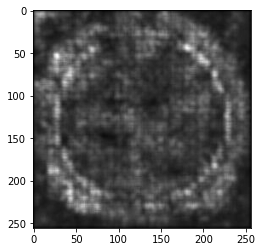

In [25]:
pred_img = Image.open(img_pred_path).convert("L")
arr_pred = np.asarray(pred_img)
plt.imshow(arr_pred, cmap='gray', vmin=0, vmax=255)

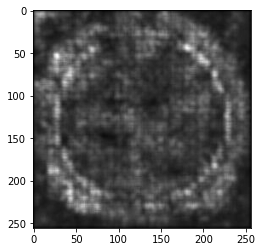

In [26]:
mask_threshold = 0
mask = arr_pred > mask_threshold
sel = np.zeros_like(arr_pred)
sel[mask] = arr_pred[mask]
plt.imshow(sel, cmap='gray', vmin=0, vmax=255)

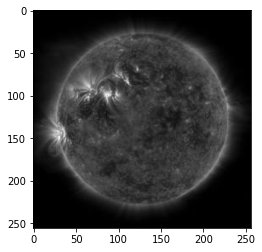

In [27]:
src_img = Image.open(img_path).convert("L")
arr = np.asarray(src_img)
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)

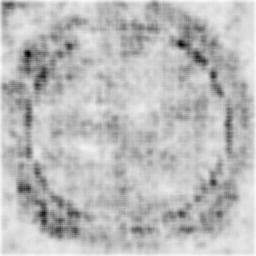

In [28]:
mask_img = Image.fromarray(np.invert(sel))
mask_img

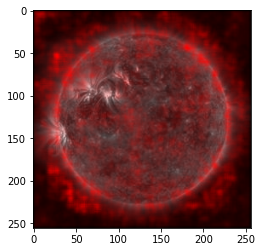

In [29]:
red = Image.new('RGB', (256, 256), color = 'red')

src_img = Image.open(img_path).convert("L")
im = Image.composite(src_img, red, mask_img)
plt.imshow(im, vmin=0, vmax=255)

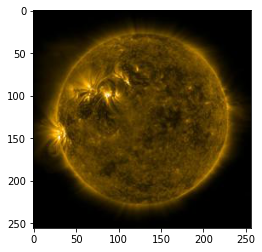

In [30]:
src_img = Image.open(img_path)
arr = np.asarray(src_img)
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)

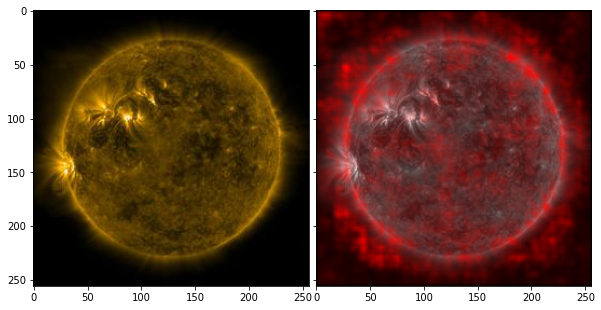

In [31]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 2),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, i in zip(grid, [arr, im]):
    # Iterating over the grid returns the Axes.
    ax.imshow(i)